# Decision Trees

Here we'll explore a class of algorithms based on decision trees.
Decision trees at their root are extremely intuitive.  They
encode a series of "if" and "else" choices, similar to how a person might make a decision.
However, which questions to ask, and how to proceed for each answer is entirely learned from the data.

For example, if you wanted to create a guide to identifying an animal found in nature, you
might ask the following series of questions:

- Is the animal bigger or smaller than a meter long?
    + *bigger*: does the animal have horns?
        - *yes*: are the horns longer than ten centimeters?
        - *no*: is the animal wearing a collar
    + *smaller*: does the animal have two or four legs?
        - *two*: does the animal have wings?
        - *four*: does the animal have a bushy tail?

and so on.  This binary splitting of questions is the essence of a decision tree.

One of the main benefit of tree-based models is that they require little preprocessing of the data.
They can work with variables of different types (continuous and discrete) and are invariant to scaling of the features.

Another benefit is that tree-based models are what is called "nonparametric", which means they don't have a fix set of parameters to learn. Instead, a tree model can become more and more flexible, if given more data.
In other words, the number of free parameters grows with the number of samples and is not fixed, as for example in linear models.


## Decision Tree Classification

### Generate a simple dataset

In [1]:
import skrub

skrub.patch_display()  # makes nice display for pandas tables

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=[[0, 0], [1, 1]], random_state=61526, n_samples=100
)
X = pd.DataFrame(X, columns=["Feature #0", "Feature #1"])
class_names = np.array(["class #0", "class #1"])
y = pd.Series(class_names[y], name="Classes").astype("category")
data = pd.concat([X, y], axis=1)
data

Processing column   3 / 3


Feature #0  Feature #1   Classes
0     1.055280    0.939240  class #1
1     1.310281   -0.693228  class #0
2    -1.600079    1.221705  class #0
3     1.424263    0.961968  class #1
4    -0.337749    0.756073  class #0
..         ...         ...       ...
95    0.281336    1.333478  class #1
96    1.533192   -0.445063  class #1
97    0.869122   -1.302438  class #0
98    0.758822   -0.039012  class #1
99   -0.357442    0.260075  class #0

[100 rows x 3 columns]

First, let's look at the generated data

In [3]:
import numpy as np
classes = np.unique(y)
print(f"The class labels are: {classes}")

The class labels are: ['class #0' 'class #1']


In [4]:
import seaborn as sns
sns.set_context("poster")

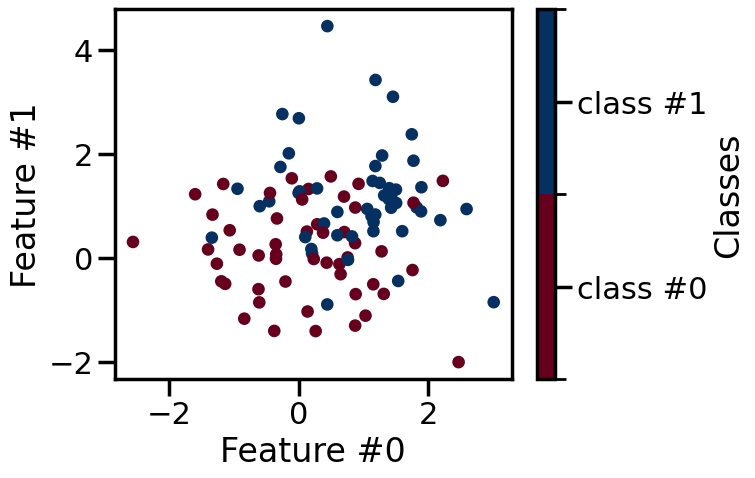

In [5]:
import matplotlib.pyplot as plt

_ = data.plot.scatter(
    x="Feature #0",
    y="Feature #1",
    c="Classes",
    s=50,
    cmap=plt.cm.RdBu,
)

We will create a function to create this scatter plot by passing 2 variables: `data` and `labels`.

### Train a decision tree classifier

We can learn a set of binary rule using a portion of the data. Using the rules learned, we will predict on the testing data.

In [6]:
from sklearn.model_selection import train_test_split

data_train, data_test, X_train, X_test, y_train, y_test = train_test_split(
    data, X, y, random_state=42
)

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
pred

array(['class #1', 'class #1', 'class #1', 'class #0', 'class #0',
       'class #1', 'class #0', 'class #1', 'class #1', 'class #1',
       'class #0', 'class #1', 'class #0', 'class #0', 'class #1',
       'class #1', 'class #1', 'class #1', 'class #1', 'class #1',
       'class #1', 'class #0', 'class #0', 'class #1', 'class #1'],
      dtype=object)

We can plot the decision boundaries found using the training data.

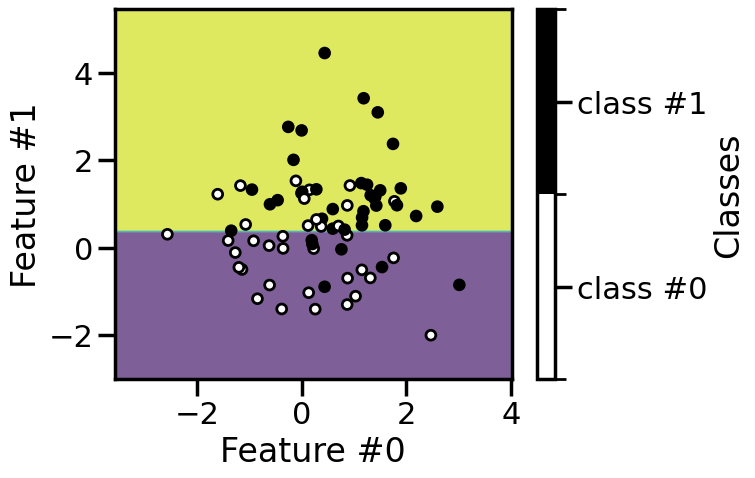

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(tree, X_train, alpha=0.7)
data_train.plot.scatter(
    x="Feature #0", y="Feature #1", c="Classes", s=50, edgecolor="black", ax=display.ax_
)
plt.show()

Similarly, we get the following classification on the testing set.

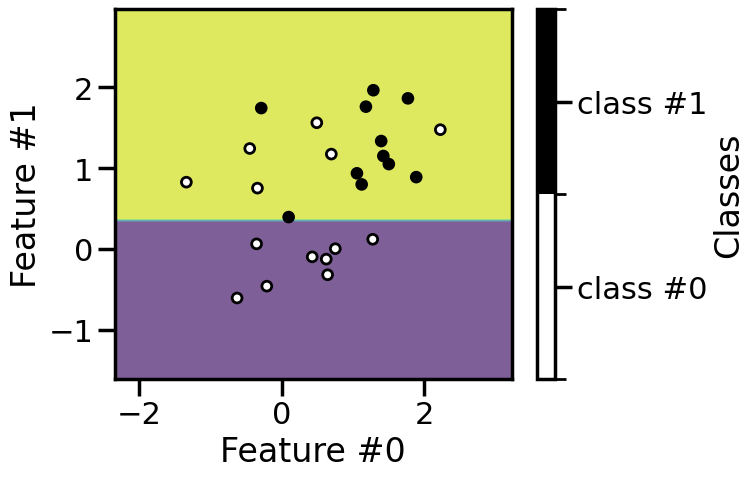

In [9]:
display = DecisionBoundaryDisplay.from_estimator(tree, X_test, alpha=0.7)
data_test.plot.scatter(
    x="Feature #0", y="Feature #1", c="Classes", s=50, edgecolor="black", ax=display.ax_
)
plt.show()

We see that the decision found with a decision tree is a simple binary split.

We can also plot the tree structure.

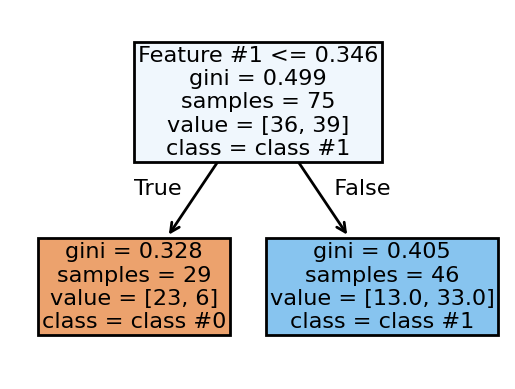

In [10]:
from sklearn.tree import plot_tree

plot_tree(tree, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
     <li> Modify the depth of the tree and see how the partitioning evolves. </li>
     <li>What can you say about under- and over-fitting of the tree model?</li>
     <li>How would you choose the best depth?</li>
     </ul>
</div>

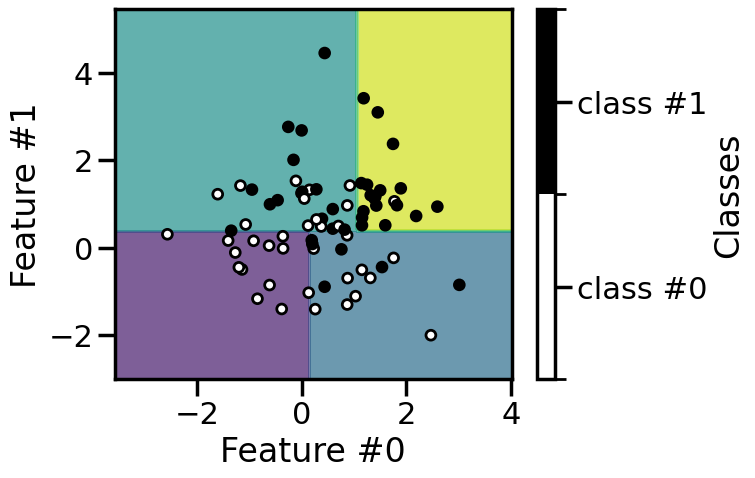

In [11]:
# my solution
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

display = DecisionBoundaryDisplay.from_estimator(tree, X_train, alpha=0.7)
data_train.plot.scatter(
    x="Feature #0", y="Feature #1", c="Classes", s=50, edgecolor="black", ax=display.ax_
)
plt.show()

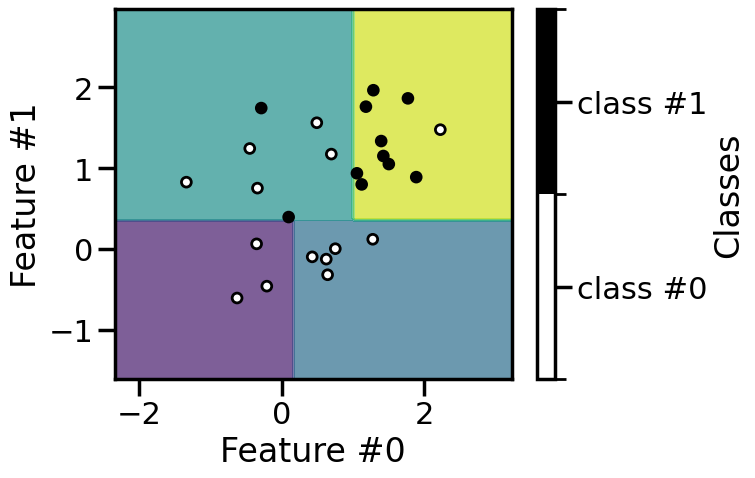

In [12]:
display = DecisionBoundaryDisplay.from_estimator(tree, X_test, alpha=0.7)
data_test.plot.scatter(
    x="Feature #0", y="Feature #1", c="Classes", s=50, edgecolor="black", ax=display.ax_
)
plt.show()

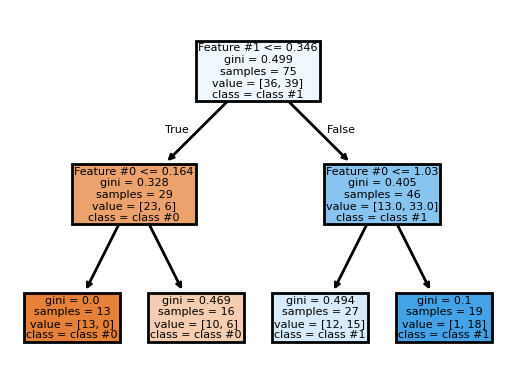

In [13]:
# my solution
plot_tree(tree, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

# as we can see in the above plots, the DecisionTressClassifier made out four different probabilities of a 
# sample belonging to the class of interest
# 
# I don't find this plot very helpful here though, because there is no legend indicating how high the 
# probability is in these areas

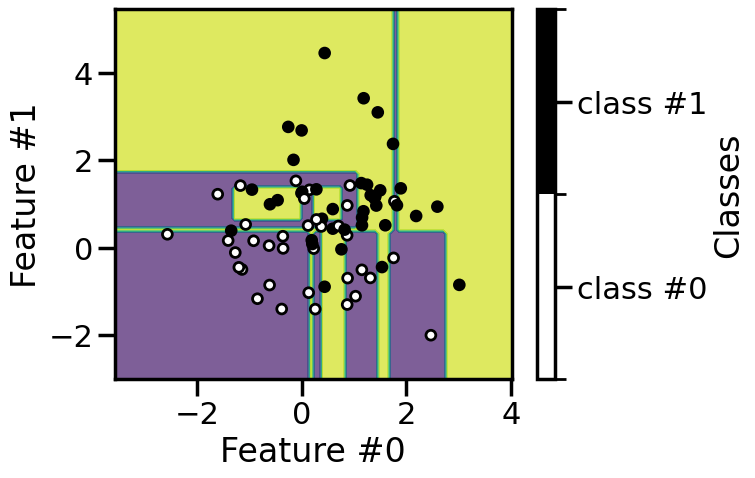

In [14]:
# my solution
tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X_train, y_train)

display = DecisionBoundaryDisplay.from_estimator(tree, X_train, alpha=0.7)
data_train.plot.scatter(
    x="Feature #0", y="Feature #1", c="Classes", s=50, edgecolor="black", ax=display.ax_
)
plt.show()

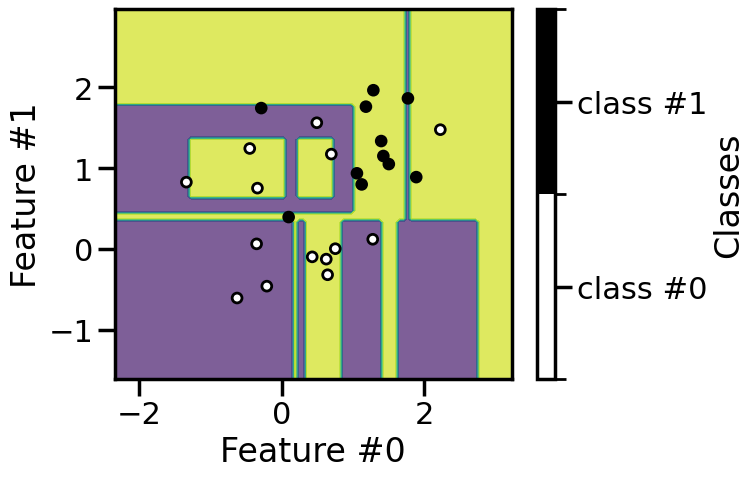

In [15]:
# my solution
display = DecisionBoundaryDisplay.from_estimator(tree, X_test, alpha=0.7)
data_test.plot.scatter(
    x="Feature #0", y="Feature #1", c="Classes", s=50, edgecolor="black", ax=display.ax_
)
plt.show()

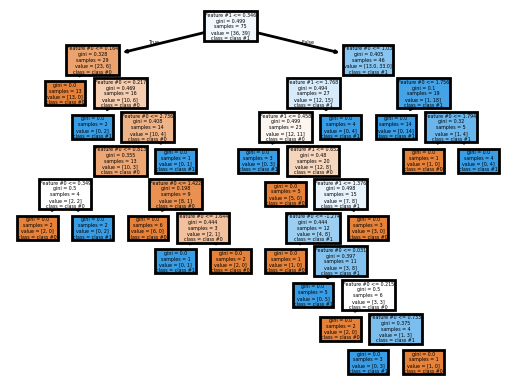

In [16]:
# my solution
plot_tree(tree, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

# we can see from the plots that DecisionTreeClassifier now only predicts two probabilities (0 and 1) for the
# class of interest, because we have now obtained full purity

# in between max_depth=2 and max_depth=None, the partitioning depends on how many different probabilities are
# found (and this depends on chance to a degree and the smaller the number of samples, the more likely
# overlapping probabilities become)

In [17]:
# my solution
#
# - tree models can easily over fit if trained to the end; if trained to short, they under fit
# - trained until the end we obtain pure purity (gini index), and a high granularity of the prediction areas,
#   that might not fit with new data points very well
# - I would check for the best depth by adjusting for the best score on the test set by hand or using 
#   GridSearch

In [18]:
# my questions
#
# - How is a decision boundary calculated? Is it rather an area or rather a line?
#   - An area: we calculate the probability for every value on the meshgrid.
# - It looks like DecisionTreeClassifier swaps the feature it decides on every time (back and forth between 
# both features); can it also take the same feature into account twice in a row, if it was more informative on 
# the target?
#   - I will actually try this out with an according data set:

In [19]:
# my experiment
#
# Let's try out if DecisionTreeClassifier will also swap the feature it bases it's decisions on, if we have 
# one informative and one non-informative feature:

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=0,
)
X = pd.DataFrame(X, columns=["Feature #0", "Feature #1"])
class_names = np.array(["class #0", "class #1"])
y = pd.Series(class_names[y], name="Classes").astype("category")
partially_informative_data = pd.concat([X, y], axis=1)
partially_informative_data

Processing column   3 / 3


Feature #0  Feature #1   Classes
0    -0.498032    0.865025  class #1
1    -0.171546    1.207816  class #1
2     1.910065   -1.221471  class #0
3     0.439392   -0.953962  class #0
4     0.396007   -1.187361  class #0
..         ...         ...       ...
95    0.681595    0.737246  class #1
96   -0.208299   -1.023810  class #0
97    1.543015    0.961714  class #1
98   -0.674333   -1.023597  class #0
99    0.017479    0.876829  class #1

[100 rows x 3 columns]

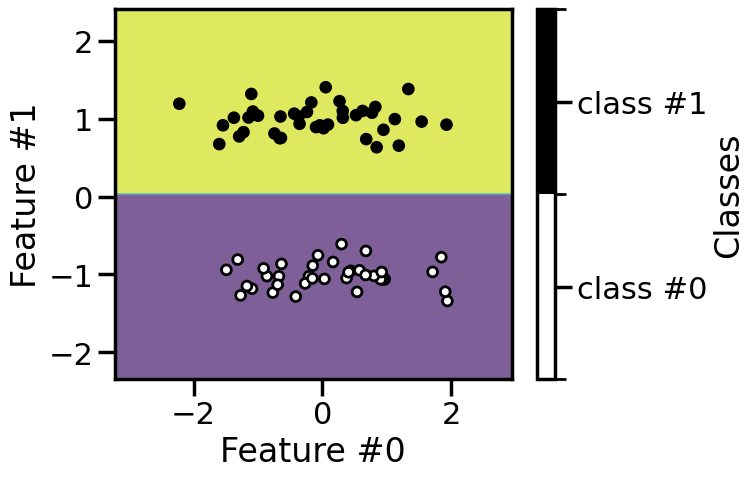

In [20]:
# my experiment
# 
data_train_exp, data_test_exp, X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    partially_informative_data, X, y, random_state=42
)

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train_exp, y_train_exp)

display = DecisionBoundaryDisplay.from_estimator(tree, X_train_exp, alpha=0.7)
data_train_exp.plot.scatter(
    x="Feature #0", y="Feature #1", c="Classes", s=50, edgecolor="black", ax=display.ax_
)
plt.show()

# No, DecisionTreeClassifier doesn't swap features. Maximal purity is reached after one split and then the 
# tree stops training.

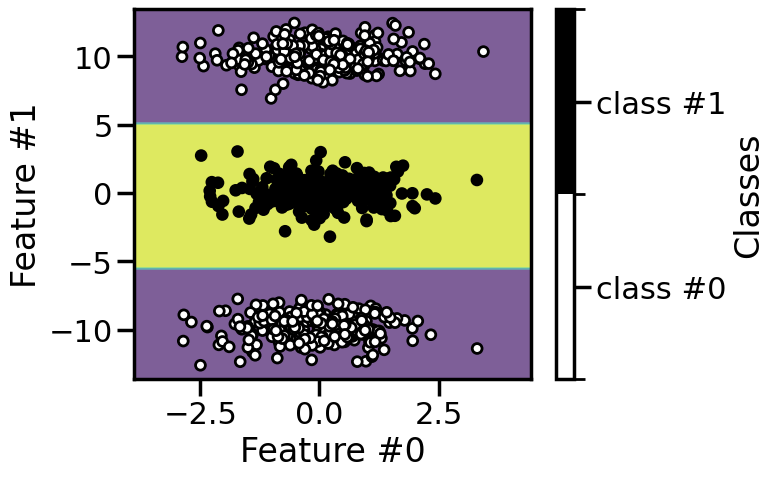

In [21]:
# my experiment
#
# Let's see what happens if maximal purity is not reached after one split

from sklearn.datasets import make_blobs

centers = [[0, 10], [0, 0], [0, -10]]
X, y = make_blobs(n_samples=1_000, centers=centers, random_state=40)
y[y==2] = 0 # class 2 is becoming class 0

X = pd.DataFrame(X, columns=["Feature #0", "Feature #1"])
class_names = np.array(["class #0", "class #1"])
y = pd.Series(class_names[y], name="Classes").astype("category")
partially_informative_data = pd.concat([X, y], axis=1)
partially_informative_data


data_train_exp, data_test_exp, X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    partially_informative_data, X, y, random_state=42
)

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train_exp, y_train_exp)

display = DecisionBoundaryDisplay.from_estimator(tree, X_train_exp, alpha=0.7)
data_train_exp.plot.scatter(
    x="Feature #0", y="Feature #1", c="Classes", s=50, edgecolor="black", ax=display.ax_
)
plt.show()

# we can see that DecisionTreeClassifier splits twice along the same feature and then stops

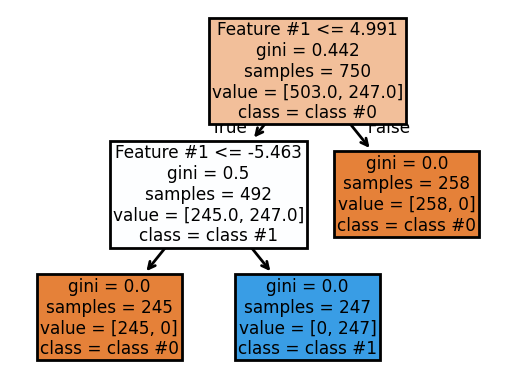

In [22]:
# my experiment

plot_tree(tree, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

# we obtain three different leaves with maximum purity

Many parameters control the complexity of a tree, but maximum depth is perhaps the easiest to understand. This
parameter limits how finely the tree can partition the input space, or how many “if-else” questions it can ask
before deciding which class a sample belongs to.

This parameter is crucial to tune for trees and tree-based models. The interactive plot below shows how
underfitting and overfitting look for this model. A `max_depth` of 1 clearly underfits the model, while a
depth of 7 or 8 clearly overfits. The maximum possible depth for this dataset is 8, at which point each leaf
contains samples from only a single class. We call these leaves “pure.”

In the interactive plot below, blue and red colors indicate the predicted class for each region. The shade of
color indicates the predicted probability for that class (darker = higher probability), while yellow regions
indicate equal predicted probability for either class.

### Aside note regarding the partitioning in decision tree

In this section, we will go slightly more into details regading how a tree is selecting the best partition. First, instead of using synthetic data, we will use a real dataset this time.

In [56]:
dataset = pd.read_csv("../datasets/penguins.csv")
dataset = dataset.dropna(subset=["Body Mass (g)"])
dataset.head()

Processing column  17 / 17


studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
5   PAL0708              6  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion    Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  2007-11-11   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  2007-11-11   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  2007-11-16   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  2007-11-16   
5  Torgersen  Adult, 1 Egg Stage          N3A2               Yes  2007-11-16   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
4                36.7               19.3                193.0         3450.0   
5                39.3               20.6                190.0         3650.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
4  FEMALE            8.76651          -25.32426   
5    MALE            8.66496          -25.29805   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
4                             NaN  
5                             NaN

We will build a decision tree to classify the penguin species using their body mass as a feature. To simplify the problem will focus only the Adelie and Gentoo species.

In [57]:
# Only select the column of interest
dataset = dataset[["Body Mass (g)", "Species"]]
# Make the species name more readable
dataset["Species"] = dataset["Species"].apply(lambda x: x.split()[0])
# Only select the Adelie and Gentoo penguins
dataset = dataset.set_index("Species").loc[["Adelie", "Gentoo"], :]
# Sort all penguins by their body mass
dataset = dataset.sort_values(by="Body Mass (g)")
# Convert the dataframe (2D) to a series (1D)
dataset = dataset.squeeze()
dataset

Species
Adelie    2850.0
Adelie    2850.0
Adelie    2900.0
Adelie    2900.0
Adelie    2900.0
           ...  
Gentoo    5950.0
Gentoo    6000.0
Gentoo    6000.0
Gentoo    6050.0
Gentoo    6300.0
Name: Body Mass (g), Length: 274, dtype: float64

We will first look at the body mass distribution for each specie.

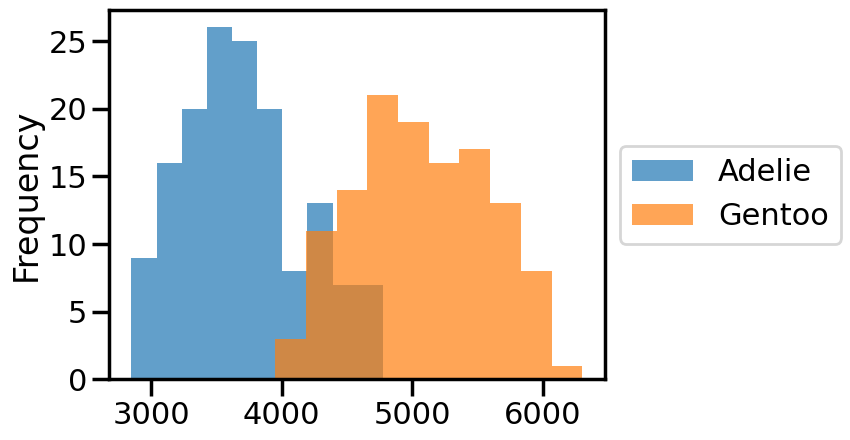

In [58]:
_, ax = plt.subplots()
dataset.groupby("Species").plot.hist(ax=ax, alpha=0.7, legend=True)
ax.set_ylabel("Frequency")
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Instead of looking at the distribution, we can look at all samples directly.

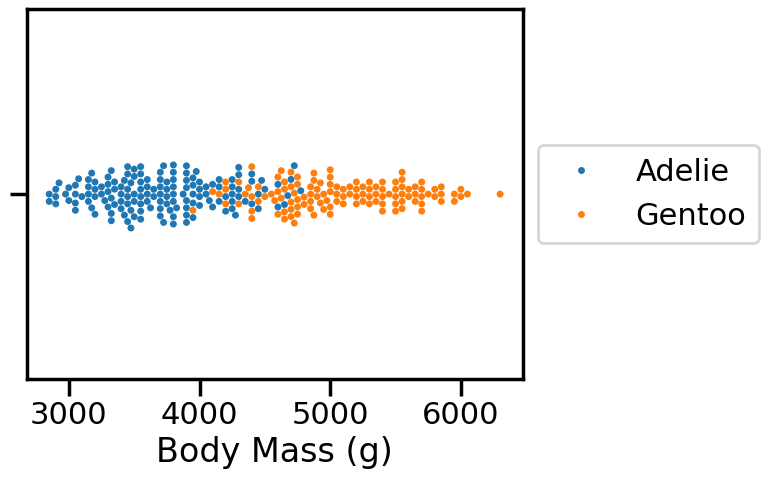

In [ ]:
ax = sns.swarmplot(x=dataset.values, y=[""] * len(dataset), hue=dataset.index)
ax.set_xlabel(dataset.name)
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

When we build a tree, we want to find splits that partition the data into groups that are as “unmixed” as
possible. Let’s make a first completely random split to highlight the principle.

In [62]:
# create a random state such we all have the same results
rng = np.random.RandomState(42)

/tmp/ipykernel_1030745/674541992.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(f"Body mass threshold: {dataset[random_idx]} grams")
/tmp/ipykernel_1030745/674541992.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.vlines(dataset[random_idx], -1, 1, color="red", linestyle="--")


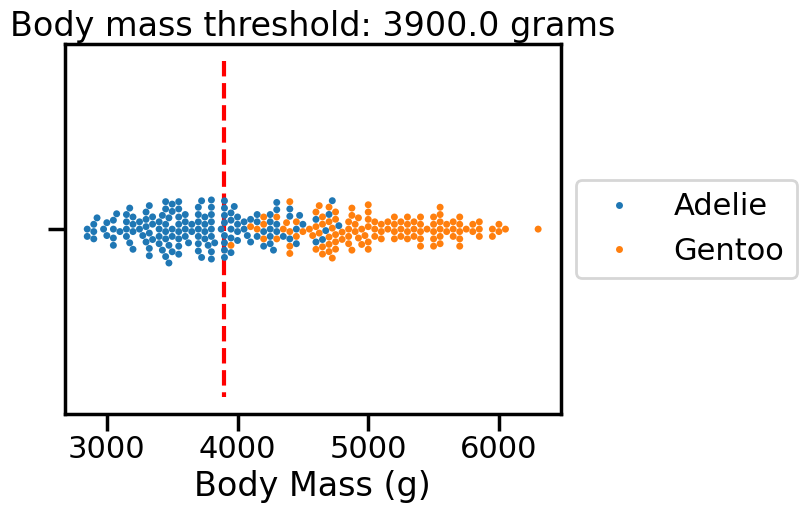

In [63]:
random_idx = rng.choice(dataset.size)

ax = sns.swarmplot(x=dataset.values, y=[""] * len(dataset), hue=dataset.index)
ax.set_xlabel(dataset.name)
ax.set_title(f"Body mass threshold: {dataset[random_idx]} grams")
ax.vlines(dataset[random_idx], -1, 1, color="red", linestyle="--")
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

After the split, we want two partitions where samples come from a single class as much as possible and contain
as many samples as possible. Decision trees use a criterion to assess split quality. Entropy describes the
class mixture in a partition. Let’s compute the entropy for the full dataset and the sets on each side of the
split.

#### # some research

Gini Index: $G = 1 - \sum p_i^2$ (where the summation sums over all the classes)

Entropy: $H = -\sum p_i \log_2 p_i$ (where the summation sums over all the classes)

- where $p_i$​ is the proportion of class $i$ in a node

- gini index measures how often a randomly chosen element would be misclassified if randomly labeled based on
  class distribution and is faster to compute than entropy (no logarithm)

- entropy measures uncertainty in the class distribution

- scikit-learn's DecisionTreeClassifier has a `criterion` param to pick which purity measure to use: </br>
`criterion{“gini”, “entropy”, “log_loss”}, default=”gini”`

In [64]:
from scipy.stats import entropy

In [65]:
dataset.index.value_counts()

Species
Adelie    151
Gentoo    123
Name: count, dtype: int64

In [66]:
parent_entropy = entropy(
    dataset.index.value_counts(normalize=True)
)
parent_entropy

np.float64(0.6879166791258041)

In [68]:
left_entropy = entropy(
    dataset[:random_idx].index.value_counts(normalize=True)
)
left_entropy

np.float64(0.0)

In [69]:
right_entropy = entropy(
    dataset[random_idx:].index.value_counts(normalize=True)
)
right_entropy

np.float64(0.5975068586842202)

We can see the quality of the split by combining the entropies. This is known as the **information gain**.

In [70]:
parent_entropy - (left_entropy + right_entropy)

np.float64(0.09040982044158397)

However, we should normalize the entropies with the number of samples in each sets.

In [71]:
def information_gain(labels_parent, labels_left, labels_right):
    # compute the entropies
    entropy_parent = entropy(labels_parent.value_counts(normalize=True))
    entropy_left = entropy(labels_left.value_counts(normalize=True))
    entropy_right = entropy(labels_right.value_counts(normalize=True))

    n_samples_parent = labels_parent.size
    n_samples_left = labels_left.size
    n_samples_right = labels_right.size

    # normalize with the number of samples
    normalized_entropy_left = ((n_samples_left / n_samples_parent) * 
                               entropy_left)
    normalized_entropy_right = ((n_samples_right / n_samples_parent) *
                                entropy_right)

    return (entropy_parent -
            normalized_entropy_left - normalized_entropy_right)

In [72]:
information_gain(
    dataset.index,
    dataset[:random_idx].index,
    dataset[random_idx:].index
)

np.float64(0.3128393809736659)

### # some research
- normalising the entropies of each split before using it to calculate the information gain will results in
  weighting the contribution of each split

    - larger partitions contribute proportionally to the total entropy
    
    - we don't want a small split with very low entropy (pure class) to dominate the calculation, even though it's insignificant in terms of total sample

So, we can compute the information gain for all possible body mass thresholds.

In [73]:
all_information_gain = pd.Series(
    [information_gain(dataset.index, dataset[:idx].index, dataset[idx:].index)
     for idx in range(dataset.size)],
    index=dataset,
)

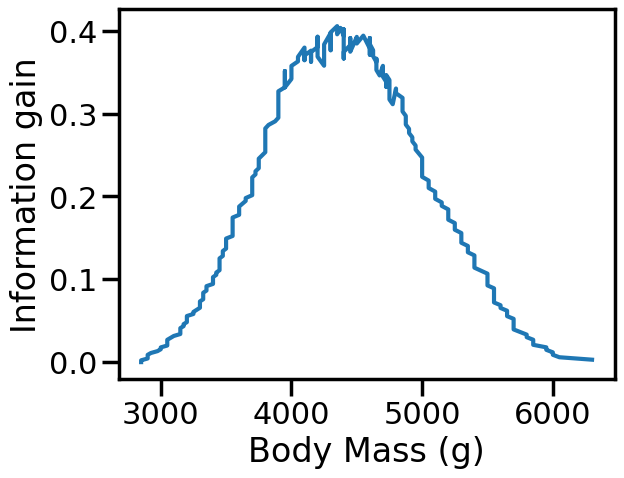

In [74]:
ax = all_information_gain.plot()
_ = ax.set_ylabel("Information gain")

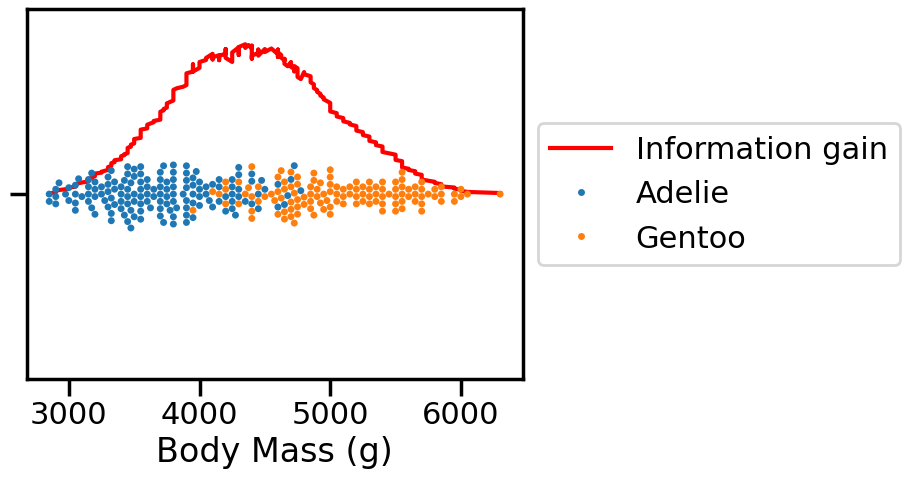

In [80]:
ax = (all_information_gain * -1).plot(color="red", label="Information gain")
ax = sns.swarmplot(x=dataset.values, y=[""] * len(dataset), hue=dataset.index)
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

### # question

I don't understand why we need to multipy all_information_gain with -1 (`all_information_gain * -1`) in order
to plot it as positive values, because:

1. `all_information_gain.describe()` confirms that it's values are already non-negative
2. the plot above this one also plots `all_information_gain` as positive values

In [84]:
all_information_gain.describe()

count    274.000000
mean       0.214128
std        0.129684
min        0.000000
25%        0.094792
50%        0.213311
75%        0.345608
max        0.405479
dtype: float64

We can see that the maximum of the information gain corresponds to the split which best partition our data. So we can check the corresponding body mass threshold.

In [85]:
all_information_gain.idxmax() 

# remark: we cannot use np.argmax() here, because here our indices are the mass of the penguins in grams 
# 
# thinking about it, I think we shouldn't use the grams as an index, because likely two penguins have the same
# weight

np.float64(4350.0)

In [97]:
# checking if several penguins have the same mass, and they do ...

all_information_gain.index.value_counts()

Body Mass (g)
3550.0    8
3800.0    8
3900.0    8
4400.0    7
3700.0    7
         ..
4775.0    1
5450.0    1
5750.0    1
6050.0    1
6300.0    1
Name: count, Length: 89, dtype: int64

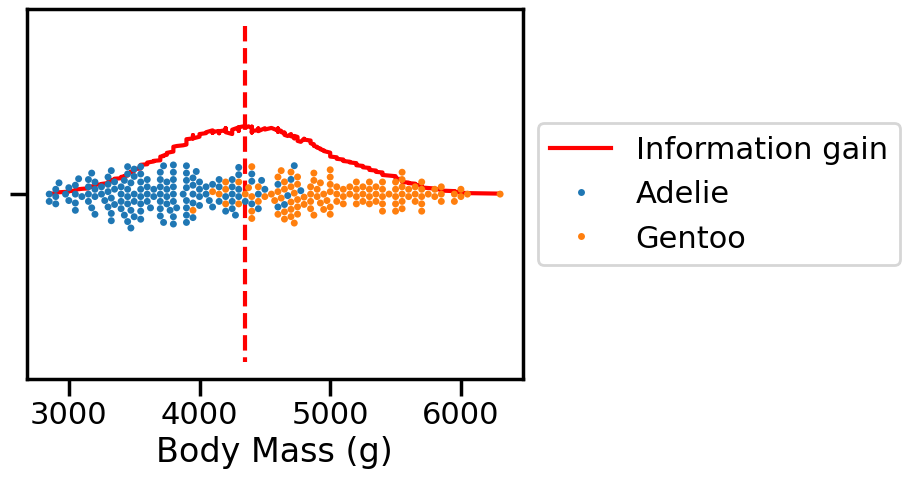

In [98]:
ax = (all_information_gain * -1).plot(color="red", label="Information gain")
ax = sns.swarmplot(x=dataset.values, y=[""] * len(dataset), hue=dataset.index)
ax.vlines(
    all_information_gain.idxmax(), -1, 1,
    color="red", linestyle="--"
)
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

## Decision Tree Regression

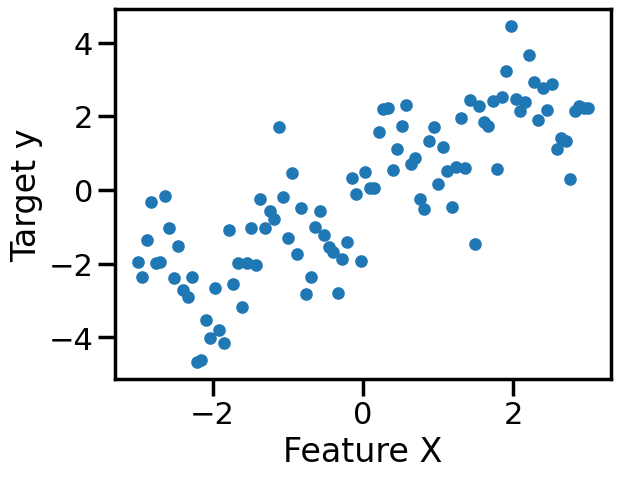

In [99]:
rnd = np.random.RandomState(42)
x = np.linspace(-3, 3, 100)
y_no_noise = np.sin(4 * x) + x
y = y_no_noise + rnd.normal(size=len(x))
X = x.reshape(-1, 1)

plt.figure()
plt.xlabel('Feature X')
plt.ylabel('Target y')
_ = plt.scatter(X, y, s=50)

In [100]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

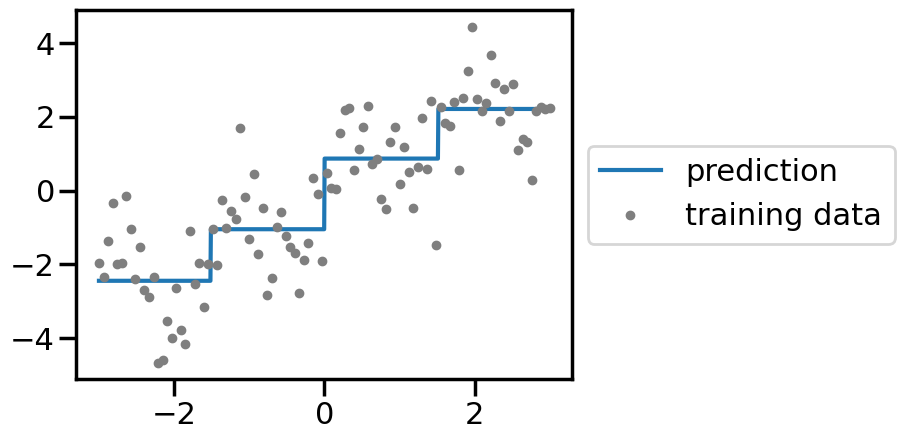

In [101]:
X_test = np.linspace(-3, 3, 1000).reshape((-1, 1))
y_test = reg.predict(X_test)

plt.figure()
plt.plot(X_test.ravel(), y_test, color='tab:blue', label="prediction")
plt.plot(X.ravel(), y, 'C7.', label="training data")
_ = plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

A single decision tree estimates the signal non-parametrically but has some issues. In some regions, the model
shows high bias and underfits the data (seen in long flat lines that don’t follow data contours), while in
other regions it shows high variance and overfits (seen in narrow spikes influenced by noise in single
points).

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Take the above example and repeat the training/testing by changing depth of the tree.
      </li>
      <li>
      What can you conclude?
      </li>
    </ul>
</div>

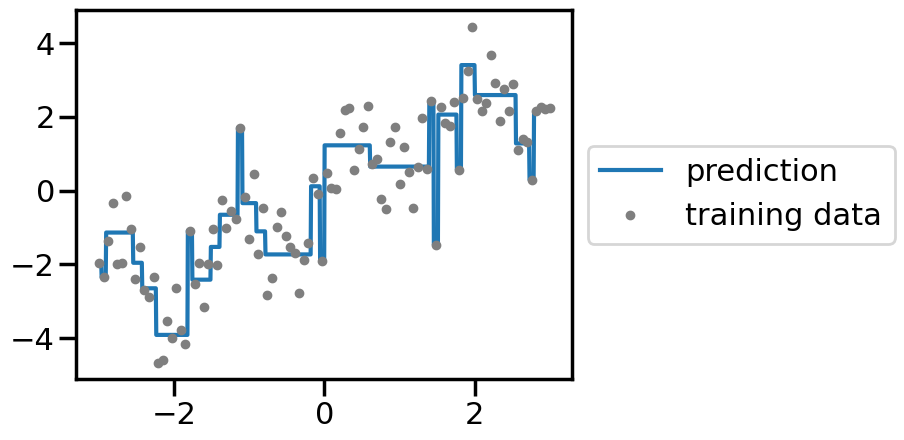

In [ ]:
# my solution

reg_with_more_depth = DecisionTreeRegressor(max_depth=5)
reg_with_more_depth.fit(X, y)

X_test = np.linspace(-3, 3, 1000).reshape((-1, 1))
y_test = reg_with_more_depth.predict(X_test)

plt.figure()
plt.plot(X_test.ravel(), y_test, color='tab:blue', label="prediction")
plt.plot(X.ravel(), y, 'C7.', label="training data")
_ = plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [104]:
# my solution

# I conclude that the above comment on regions with over and underfit is correct.
# Each piece of this piecewise function is a node and often enough, the shorter pieces are too pure (overfitting).
# We need to be careful not to train a DecisionTree for two long.

In [109]:
# my experiment

# let's try to inspect this tree more

reg_with_more_depth.tree_.value.shape

# I understand that each value stands for a node, but not what the values in the nodes are: impurity measures
# maybe? Answering my own question: the docs say that "each node has a value array which is the proportion of
# weighted samples reaching this node".
#
# I was skipping through this example to find this information, but it is confusing enough to not to look into
# it further:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

(55, 1, 1)

In [111]:
# my experiment

print(reg_with_more_depth.tree_.value[0])
print(reg_with_more_depth.tree_.value[1])
print(reg_with_more_depth.tree_.value[2])
print(reg_with_more_depth.tree_.value[3])
print(reg_with_more_depth.tree_.value[-1])

# I cannot interpret these numbers, because of two things:
#
# 1. I guess the 0 node is the root node, but how the nodes are sorted afterwards remains in the dark; from up
#    to down and then from left to right, or in the order of splitting?
#
# 2. Also the numbers of the "proportion of weighted samples reaching this node" doesn't make any sense to me:
#    I would expect those to be sorted from smaller values on the first node and then getting smaller
#    (strictly or not strictly, depending on how the nodes are sorted in the array). But this is obviously not
#    the case.  And how can there be a negative proportion or values higher than 1? 

[[-0.10384652]]
[[-1.74868539]]
[[-2.44827496]]
[[-1.50771167]]
[[2.24056854]]


## Other tree hyperparameters

The `max_depth` hyperparameter controls overall tree complexity. This parameter works well when a tree is
symmetric. However, trees are not guaranteed to be symmetric. In fact, optimal generalization might require
some branches to grow deeper than others.

We build a dataset to illustrate this asymmetry. We generate a dataset with 2 subsets: one where the tree
should find a clear separation and another where samples from both classes mix. This means a decision tree
needs more splits to properly classify samples from the second subset than from the first subset.

In [112]:
from sklearn.datasets import make_blobs

feature_names = ["Feature #0", "Feature #1"]
target_name = "Class"

# Blobs that will be interlaced
X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0, 0], [-1, -1]], random_state=0
)
# Blobs that will be easily separated
X_2, y_2 = make_blobs(
    n_samples=300, centers=[[3, 6], [7, 0]], random_state=0
)

X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])
data = np.concatenate([X, y[:, np.newaxis]], axis=1)
data = pd.DataFrame(
    data, columns=feature_names + [target_name])
data[target_name] = data[target_name].astype(np.int64).astype("category")
data

Processing column   3 / 3


Feature #0  Feature #1 Class
0      0.950088   -0.151357     0
1      1.955912    0.390093     0
2     -1.353432   -2.616474     1
3     -0.455533    0.017479     0
4      0.465662   -1.536244     0
..          ...         ...   ...
595    7.453782   -1.829740     1
596    2.260437    7.543015     0
597    4.099660    6.655264     0
598    7.284280    1.742669     1
599    8.078197   -2.559185     1

[600 rows x 3 columns]

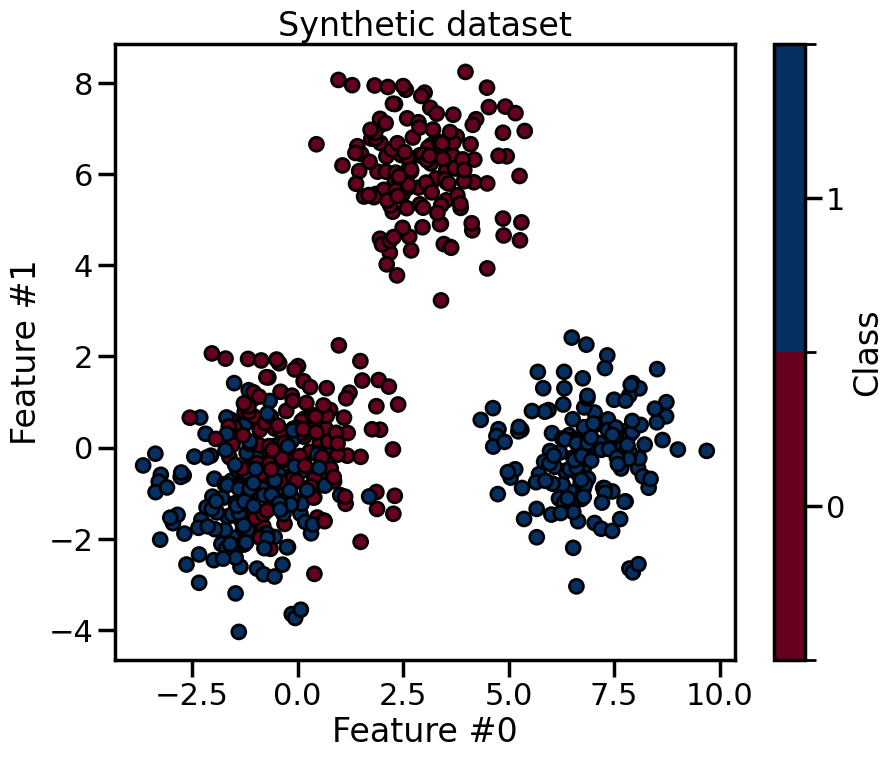

In [113]:
_, ax = plt.subplots(figsize=(10, 8))
data.plot.scatter(
    x="Feature #0",
    y="Feature #1",
    c="Class",
    s=100,
    cmap=plt.cm.RdBu,
    edgecolor="k",
    ax=ax,
)
_ = plt.title("Synthetic dataset")

We will first train a shallow decision tree with max_depth=2. We would expect this depth to be enough to separate the blobs that are easy to separate.

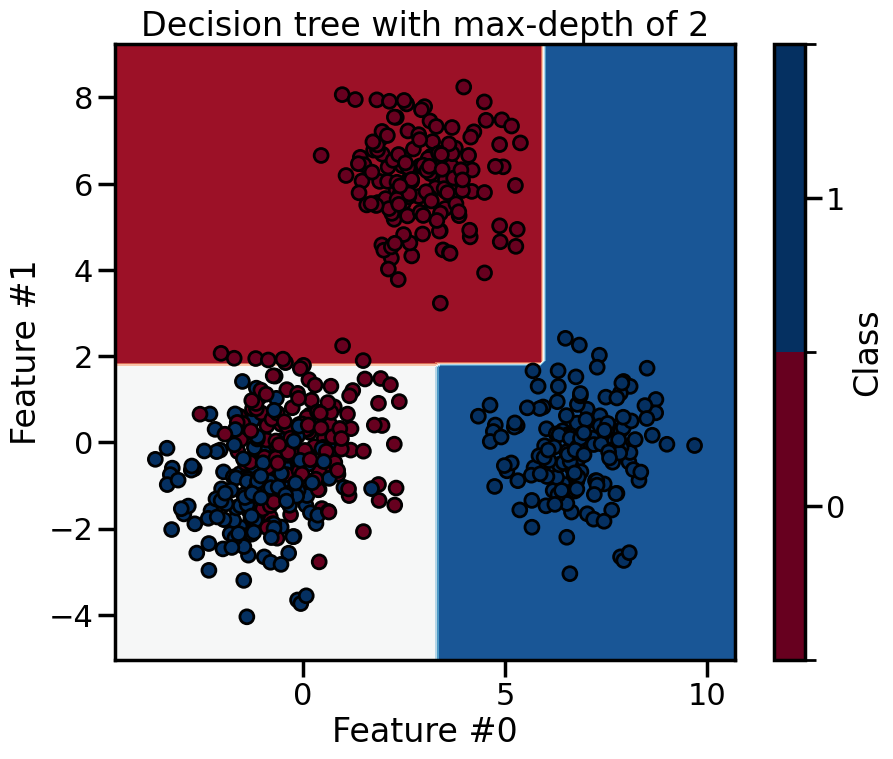

In [115]:
max_depth = 2
tree = DecisionTreeClassifier(max_depth=max_depth)
tree.fit(X, y)

_, ax = plt.subplots(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(tree, X, cmap=plt.cm.RdBu, ax=ax)
data.plot.scatter(
    x="Feature #0",
    y="Feature #1",
    c="Class",
    s=100,
    cmap=plt.cm.RdBu,
    edgecolor="k",
    ax=ax,
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

In [117]:
#question: Why is there an area without prediction? There should be a node with very low impurity but a
#prediction at this place.

As expected, we see that the blue blob on the right and the red blob on the top are easily separated. However, more splits will be required to better split the blob were both blue and red data points are mixed.

Indeed, we see that red blob on the top and the blue blob on the right of the plot are perfectly separated. However, the tree is still making mistakes in the area where the blobs are mixed together. Let’s check the tree representation.

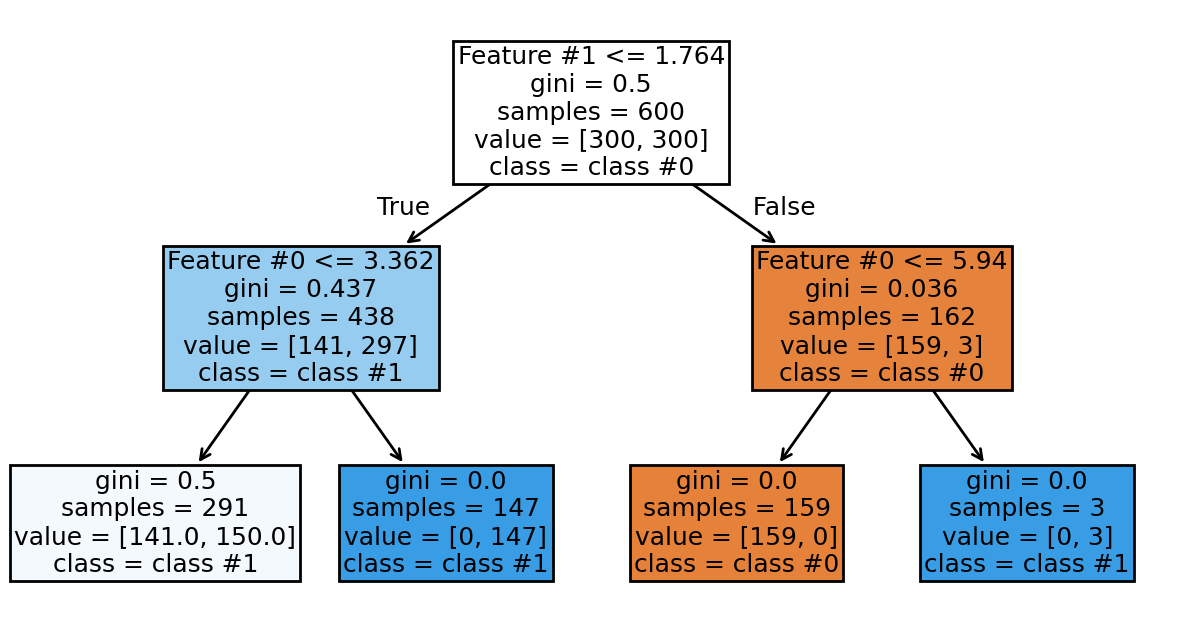

In [116]:
_, ax = plt.subplots(figsize=(15, 8))
_ = plot_tree(
    tree, feature_names=feature_names, class_names=class_names, filled=True, ax=ax
)

In [118]:
# remark: I can see that the node on the bottom left has a gini index of 0.5 and represents the mixed
# samples/blobs; but the class is still class #1, isn't it?

We see that the right branch achieves perfect classification. Now, we increase the depth to check how the tree will grow.

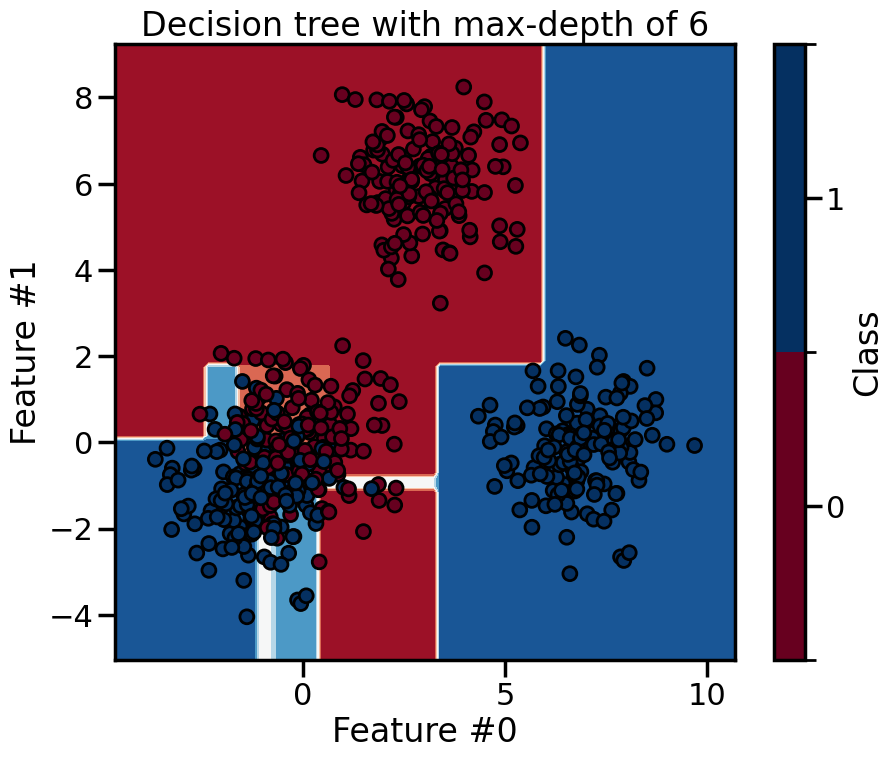

In [119]:
max_depth = 6
tree = DecisionTreeClassifier(max_depth=max_depth)
tree.fit(X, y)

_, ax = plt.subplots(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(tree, X, cmap=plt.cm.RdBu, ax=ax)
data.plot.scatter(
    x="Feature #0",
    y="Feature #1",
    c="Class",
    s=100,
    cmap=plt.cm.RdBu,
    edgecolor="k",
    ax=ax,
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

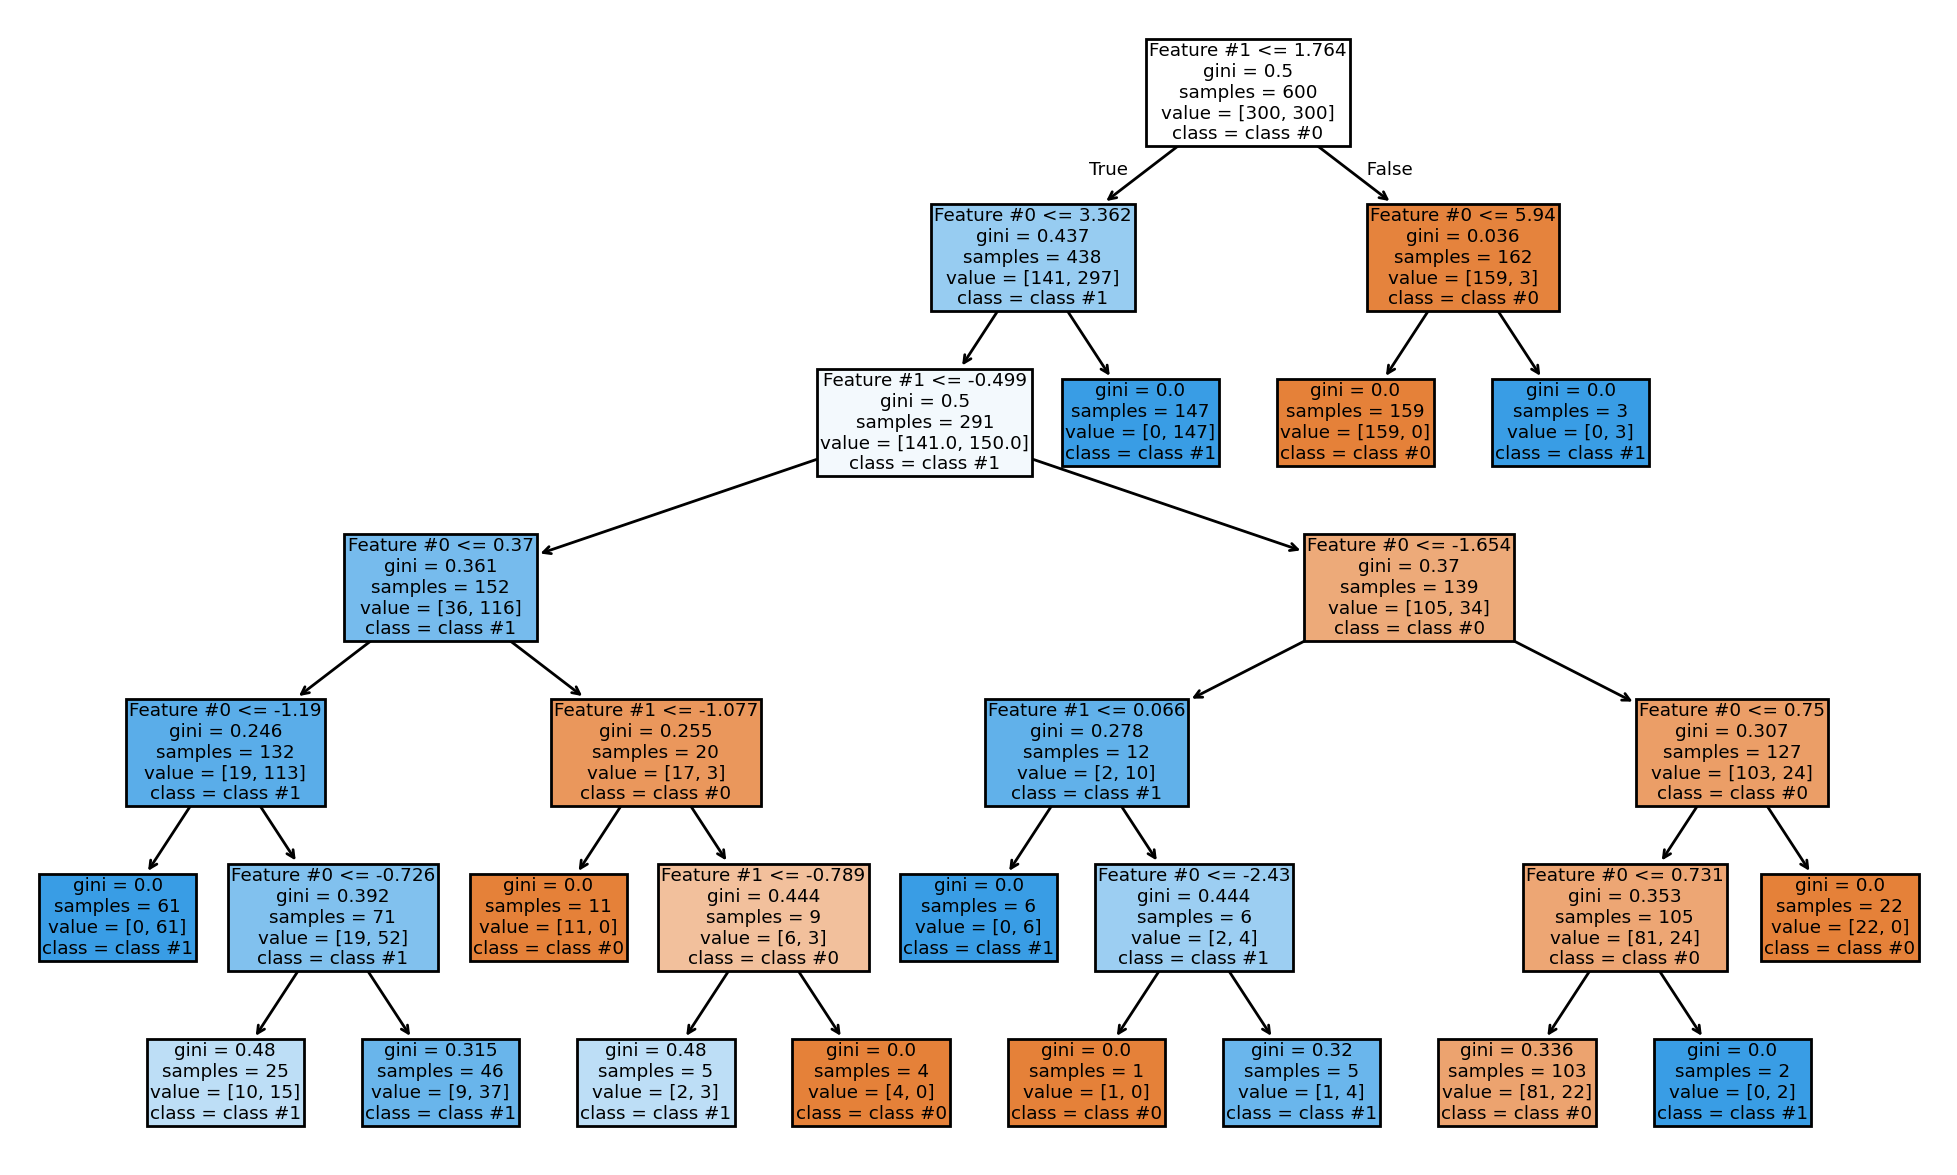

In [120]:
_, ax = plt.subplots(figsize=(25, 15))
_ = plot_tree(
    tree, feature_names=feature_names, class_names=class_names, filled=True, ax=ax
)

As expected, the left branch of the tree continue to grow while no further splits were done on the right branch. Fixing the max_depth parameter would cut the tree horizontally at a specific level, whether or not it would be more beneficial that a branch continue growing.

The hyperparameters `min_samples_leaf`, `min_samples_split`, `max_leaf_nodes`, or `min_impurity_decrease` allows growing asymmetric trees and apply a constraint at the leaves or nodes level. We will check the effect of `min_samples_leaf`.

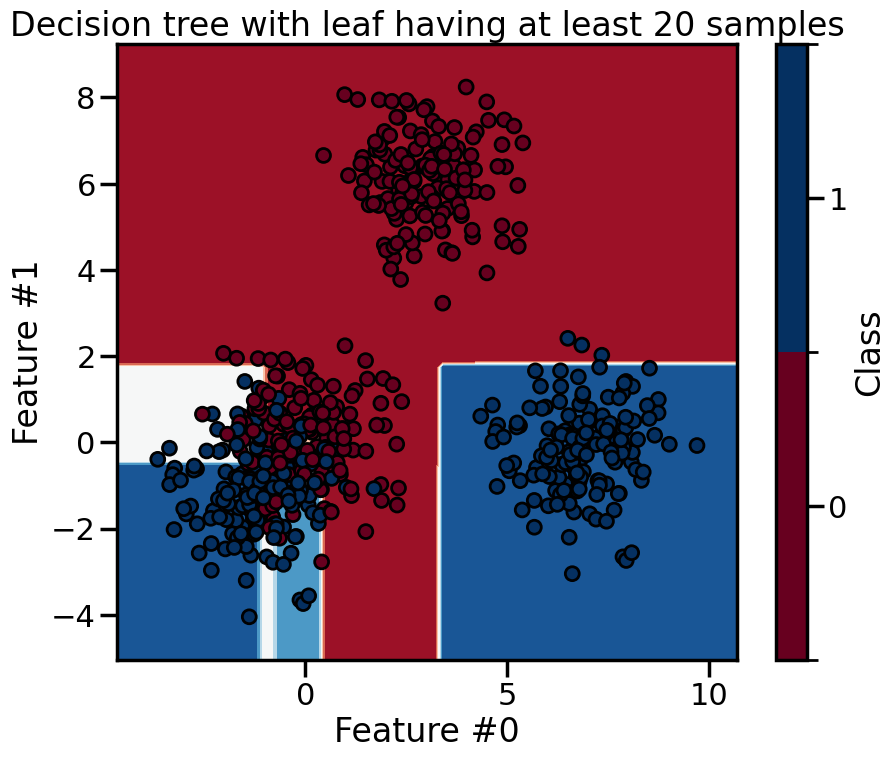

In [121]:
min_samples_leaf = 20
tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
tree.fit(X, y)

_, ax = plt.subplots(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(tree, X, cmap=plt.cm.RdBu, ax=ax)
data.plot.scatter(
    x="Feature #0",
    y="Feature #1",
    c="Class",
    s=100,
    cmap=plt.cm.RdBu,
    edgecolor="k",
    ax=ax,
)
_ = plt.title(
    f"Decision tree with leaf having at least {min_samples_leaf} samples")

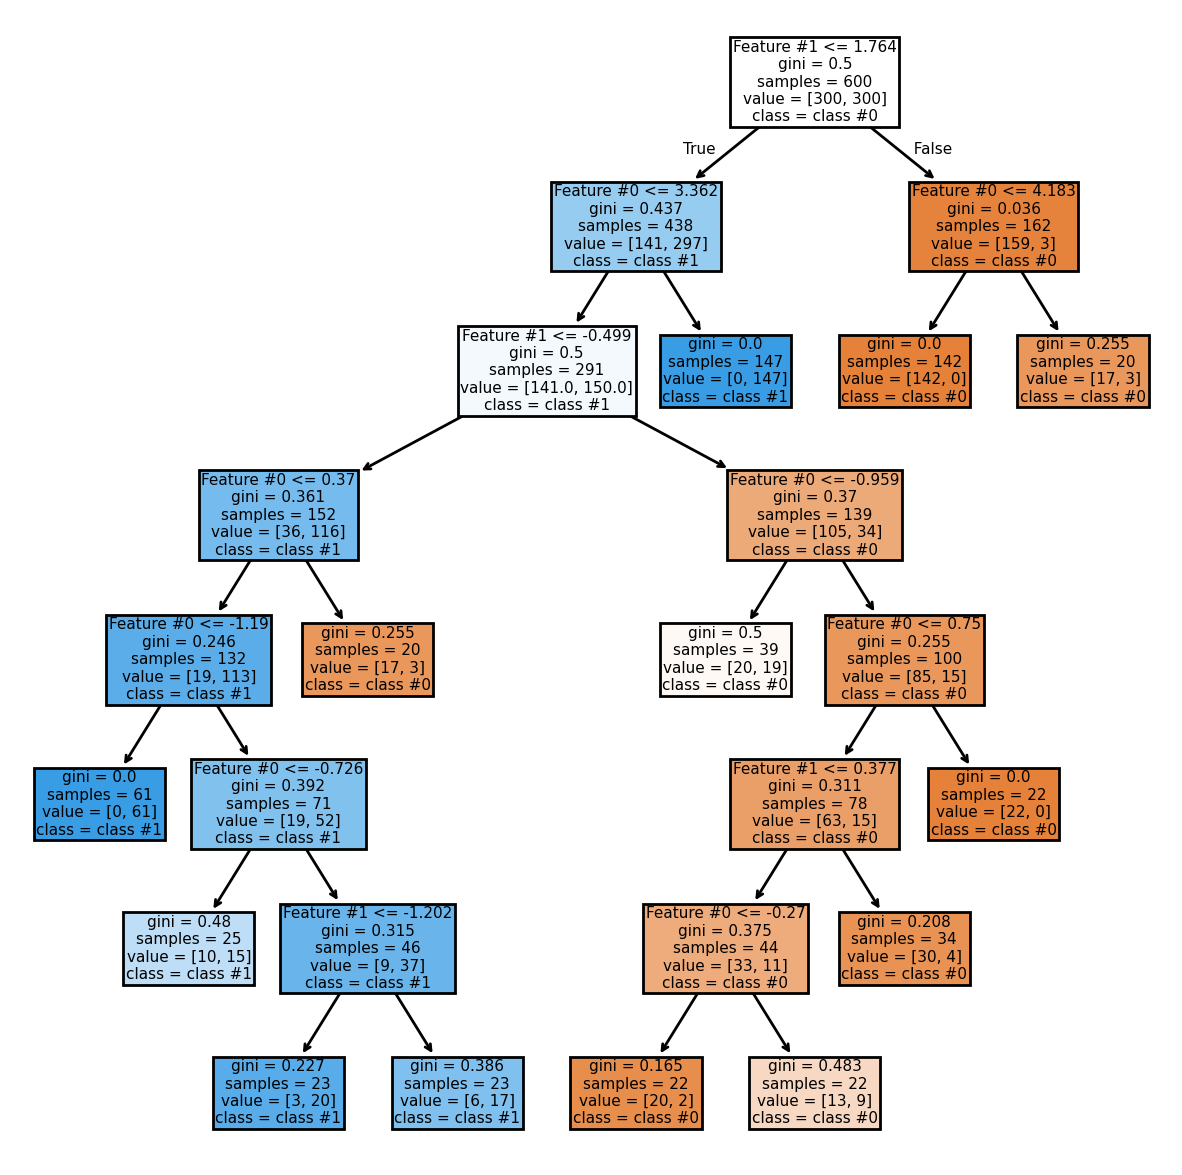

In [122]:
_, ax = plt.subplots(figsize=(15, 15))
_ = plot_tree(
    tree, feature_names=feature_names, class_names=class_names, filled=True, ax=ax
)

This hyperparameter allows to have leaves with a minimum number of samples and no further splits will be search otherwise. Therefore, these hyperparameters could be an alternative to fix the max_depth hyperparameter.